In [74]:
import pandas as pd
import numpy as np
import csv, json
import matplotlib.pyplot as plt
import re
from urllib.parse import urlparse
from pandas import Series

In [26]:
def getID(url):
    parsed_url = urlparse(url)
    path_segments = parsed_url.path.split('/')
    return int(path_segments[3])
getID("https://www.tiktokv.com/share/video/7315561816673750318/")

7315561816673750318

In [36]:
def processCsv(csvd):
    csvdf = csvd
    position = csvdf.columns.get_loc('video_timestamp') + 1
    csvdf.insert(position, 'video_time_watched', np.nan)
    return csvdf

In [58]:
def processJson(jsond): #for Sec2Gr2 files
    jsondf = jsond
    jsondf['video_id'] = jsondf['Link'].apply(getID)
    return jsondf

def processJson2(jsonfilename): #for Sec1Gr1 files
    filename = f'{jsonfilename}'
    with open(filename, 'r') as file:
        jsondata = json.load(file)

    jsondict = {'Date':[],'Link':[],'video_id':[]}
    for video in jsondata['data']:
        jsondict['Link'].append(video[1])
        jsondict['video_id'].append(getID(video[1])) 
        jsondict['Date'].append(video[0])

    jsondf = pd.DataFrame(jsondict)
    return jsondf
    

In [7]:
#for ech pair create new df with date
def merged_date(csvd, jsond):
    csvdf = csvd
    jsondf = jsond
    csvrow = 0
    jsonrow = 0
    for id in jsondf['video_id']: #for each video watched in json
        if id == csvdf['video_id'][csvrow]: #if the id for the json equals the next csv row
            csvdf.loc[csvrow, 'video_time_watched'] = jsondf.loc[jsonrow, 'Date']
            if csvrow < len(csvdf)-1:
                csvrow = csvrow+1   #go on to the next csv row
        jsonrow = jsonrow + 1  #go to the next json no matter if match or not
    return csvdf



In [64]:
#processjson and csv and insert
def mergefile(csv,json): #for Sec2gr2 files
    csvfile = pd.read_csv(f'{csv}')
    jsonfile = pd.read_json(f'{json}')
    return merged_date(processCsv(csvfile), processJson(jsonfile))

def mergefile2(csv,json): #for Sec1Gr1 files
    csvfile = pd.read_csv(f'{csv}')
    jsonfile = processJson2(f'{json}')
    return merged_date(processCsv(csvfile),jsonfile)
    
#sec1gr2_csv = pd.read_csv('pyktok_data/Sec1Gr2_26301.csv') #come back label wrong
#sec1gr2_json = pd.read_json('user_jsons/Sec2Gr2_26301.json')

In [68]:
df26301 = mergefile('pyktok_data/Sec1Gr2_26301.csv','user_jsons/Sec2Gr2_26301.json')
df33534 = mergefile('pyktok_data/Sec1Gr2_33534.csv','user_jsons/Sec2Gr2_33534.json')
df38129 = mergefile('pyktok_data/Sec1Gr2_38129.csv', 'user_jsons/Sec2Gr2_38129.json')
df11111 = mergefile('pyktok_data/Sec1Gr3_11111.csv','user_jsons/Sec1Gr3_11111.json')
df10824 = mergefile2('pyktok_data/Sec1Gr1_10824.csv','user_jsons/Sec1Gr1_10824.json')
df12345 = mergefile2('pyktok_data/Sec1Gr1_12345.csv','user_jsons/Sec1Gr1_12345.json')
df50405 = mergefile2('pyktok_data/Sec1Gr1_50405.csv','user_jsons/Sec1Gr1_50405.json')

dfs = [df26301,df33534,df38129,df10824,df12345,df50405,df11111]

all_dfs = pd.concat(dfs)
all_dfs.shape


/var/folders/ls/b1_wv00s5r5fjstz103_p3rh0000gn/T/ipykernel_31834/966991795.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2024-03-06 19:44:41' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  csvdf.loc[csvrow, 'video_time_watched'] = jsondf.loc[jsonrow, 'Date']
/var/folders/ls/b1_wv00s5r5fjstz103_p3rh0000gn/T/ipykernel_31834/966991795.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2024-03-08 03:42:17' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  csvdf.loc[csvrow, 'video_time_watched'] = jsondf.loc[jsonrow, 'Date']
/var/folders/ls/b1_wv00s5r5fjstz103_p3rh0000gn/T/ipykernel_31834/2354271149.py:3: DtypeWarning: Columns (8,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  csvfile = pd.read_csv(f

(128987, 23)

In [ ]:
ads10824 = df10824[df10824['video_is_ad']==True]
pattern1 = re.compile(r'\d{4}[-]\d{2}[-]\d{2}T\d{2}:\d{2}:\d{2}')

for row in ads10824:
    row['']


In [105]:
ads10824 = df10824[df10824['video_is_ad']==True]
ads11111 = df11111[df11111['video_is_ad']==True]
ads50405 = df50405[df50405['video_is_ad']==True]
ads12345 = df12345[df12345['video_is_ad']==True]
ads26301 = df26301[df26301['video_is_ad']==True]
ads38129 = df38129[df38129['video_is_ad']==True]
ads33534 = df33534[df33534['video_is_ad']==True]

allads = [ads10824,ads11111,ads50405,ads12345,ads26301,ads38129,ads33534]

for df in allads:
    print(df.size)

allads = [ads10824,ads50405,ads12345,ads26301,ads38129,ads33534]

ads10824.head()

5984
0
74466
37296
22659
42
26355


,Unnamed: 0,video_id,video_timestamp,video_time_watched,video_duration,video_locationcreated,suggested_words,video_diggcount,video_sharecount,video_commentcount,...,video_is_ad,video_stickers,author_username,author_name,author_followercount,author_followingcount,author_heartcount,author_videocount,author_diggcount,author_verified
1154,694,7332202104519445792,2024-02-05T14:29:02,NaN,35.0,GB,NaN,794.0,7.0,23.0,...,True,NaN,abs.tract_,abs.tract_,NaN,NaN,NaN,NaN,NaN,False
2039,1579,7283158241054330155,2023-09-26T11:33:49,NaN,5.0,US,"Shadow Work Journal, the shadow work journal, ...",877100.0,4725.0,2163.0,...,True,NaN,kartierkloe,𝗠𝗜𝗦𝗦 𝗛𝗢𝗟𝗟𝗬𝗪𝗢𝗢𝗗,NaN,NaN,NaN,NaN,NaN,False
2337,1877,7338895866134138143,2024-02-23T15:25:14,NaN,28.0,US,"birthday dance josh levi, howard university, H...",40000.0,170.0,156.0,...,True,NaN,joshleviworld,JOSH LEVI,NaN,NaN,NaN,NaN,NaN,True
2910,2450,7270661407039819010,2023-08-23T19:19:43,NaN,10.0,AU,NaN,13000.0,336.0,63.0,...,True,NaN,thatssofetchau,THATSSOFETCH,NaN,NaN,NaN,NaN,NaN,False
2914,2454,7338473378069744897,2024-02-22T12:04:45,NaN,11.0,FAKE-AD,"asos, Must Haves, ASOS Clothes, brands, Clothe...",257.0,4.0,4.0,...,True,NaN,asos,asos,NaN,NaN,NaN,NaN,NaN,False


/var/folders/ls/b1_wv00s5r5fjstz103_p3rh0000gn/T/ipykernel_31834/826795073.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ads50405['video_time_watched'] = pd.to_datetime(ads50405['video_time_watched'])


<Axes: xlabel='video_time_watched'>

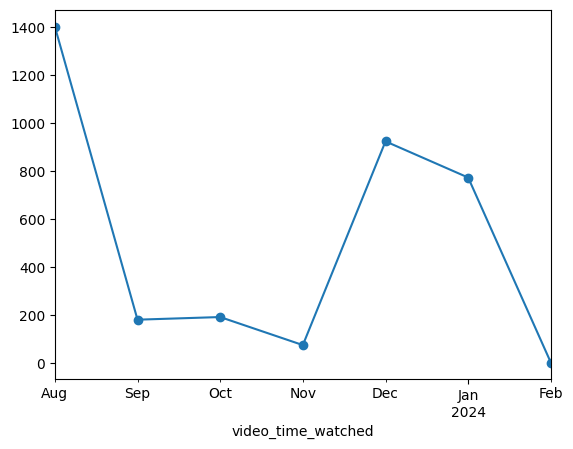

In [110]:
ads50405['video_time_watched'] = pd.to_datetime(ads50405['video_time_watched'])
monthlycounts = ads50405.groupby(ads50405['video_time_watched'].dt.to_period('M')).size()

monthlycounts.plot(kind='line', marker='o', linestyle='-')


/var/folders/ls/b1_wv00s5r5fjstz103_p3rh0000gn/T/ipykernel_31834/2496381371.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ads12345['video_time_watched'] = pd.to_datetime(ads12345['video_time_watched'])


<Axes: xlabel='video_time_watched'>

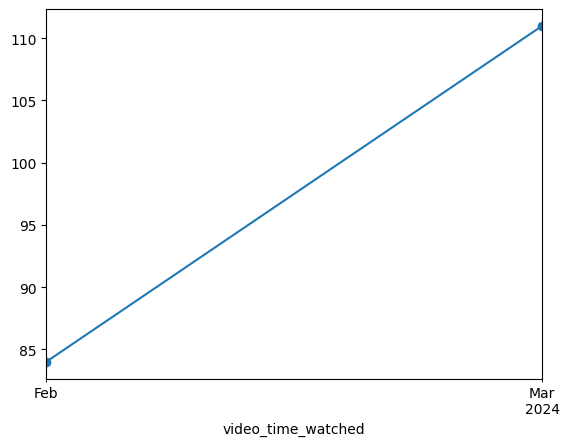

In [112]:

ads12345['video_time_watched'] = pd.to_datetime(ads12345['video_time_watched'])
monthlycounts2 = ads12345.groupby(ads12345['video_time_watched'].dt.to_period('M')).size()

monthlycounts2.plot(kind='line', marker='o', linestyle='-')

/var/folders/ls/b1_wv00s5r5fjstz103_p3rh0000gn/T/ipykernel_31834/1166844489.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adsdf['video_time_watched'] = pd.to_datetime(adsdf['video_time_watched'])


ValueError: zero-size array to reduction operation fmin which has no identity

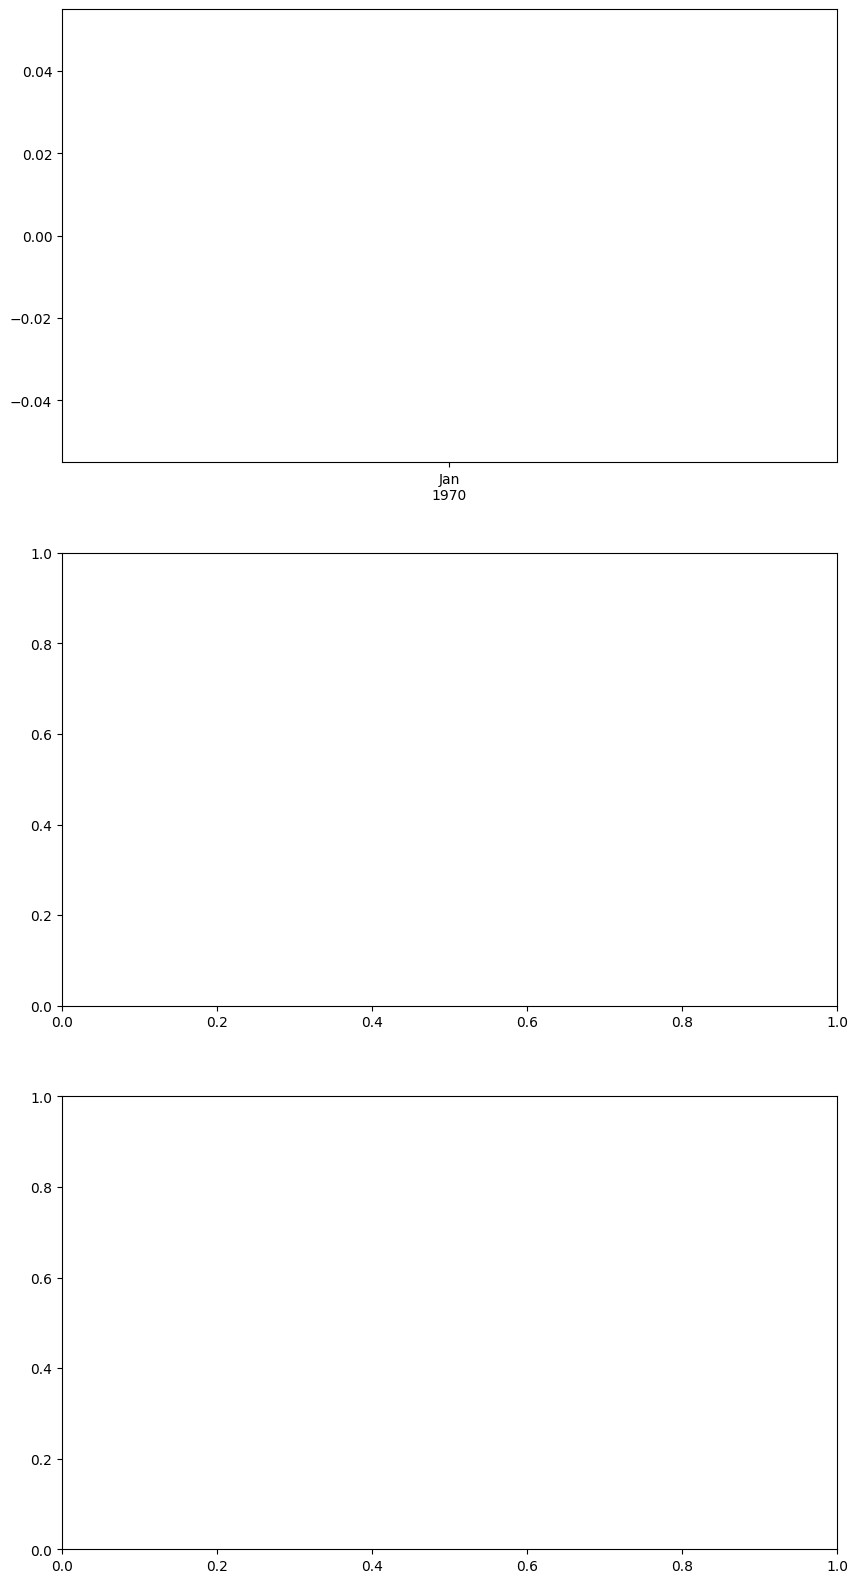

In [93]:
someads = [ads10824,ads50405,ads12345]

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 20))

for i, adsdf in enumerate(someads):
    adsdf['video_time_watched'] = pd.to_datetime(adsdf['video_time_watched'])
    monthlycounts = adsdf.groupby(adsdf['video_time_watched'].dt.to_period('M')).size()
    
    # Plot the time series on the corresponding subplot
    ax = axes[i]
    monthlycounts.plot(kind='line', marker='o', linestyle='-',ax=ax)
    
    # Customize the subplot
    ax.set_title(f'Dataframe {i+1}')
    ax.set_xlabel('Month')
    ax.set_ylabel('Number of Rows')
    ax.grid(True)

In [174]:
new = processJson(sec1gr2_json)
id = 7328816594363338030
indices = new.query('video_id == 7328816594363338030').index.tolist()
print(indices)
#print(csv.duplicated(subset='video_id').sum())

[13855]
